# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read files

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [46]:
# Convert to data frames
mouse_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

# Merge into a single data frame
study = mouse_df.merge(study_results_df)
study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
# Checking the number of unique mice id's
print(study['Mouse ID'].nunique())

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
double_entries= study.loc[study.duplicated(subset=['Mouse ID','Timepoint'])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(double_entries['Mouse ID'].unique())

# Optional: Get all the data for the duplicate mouse ID. 
#mouse_data = mouse_df.loc[mouse_df['Mouse ID']=='g989']
mouse_id = study.loc[study['Mouse ID']=='g989']
mouse_id

249
['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [76]:
## CLEAN DATA FRAME (included an option to only drop the duplicated values of the mouse, not the entire id associated)
#clean_study= study.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_study =study[study['Mouse ID'] != 'g989']
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
clean_study['Mouse ID'].nunique()

248

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
desvest = clean_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

regimen = pd.DataFrame({
    "mean tumor volume (mm3)": mean,
    "median tumor volume (mm3)": median,
    "variance by tumor volume (mm3)": var,
    "standar deviation tumor volume (mm3)": desvest,
    "standard error tumor volume (mm3)": sem
})

regimen

C:\Users\OMEN\AppData\Local\Temp\ipykernel_55464\42947910.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
C:\Users\OMEN\AppData\Local\Temp\ipykernel_55464\42947910.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
C:\Users\OMEN\AppData\Local\Temp\ipykernel_55464\42947910.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sele

,mean tumor volume (mm3),median tumor volume (mm3),variance by tumor volume (mm3),standar deviation tumor volume (mm3),standard error tumor volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#describe_regimen = clean_study.groupby('Drug Regimen').describe()['Tumor Volume (mm3)']
regimen_agg = study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

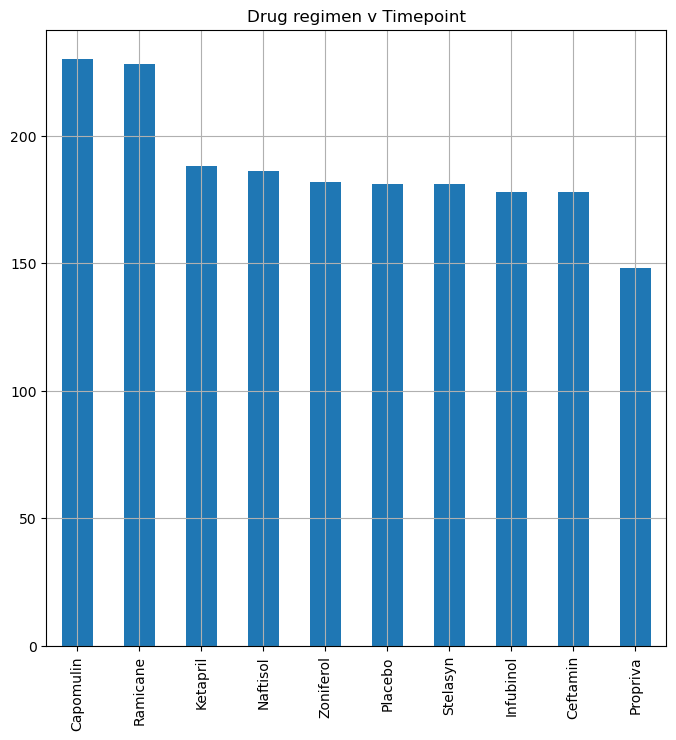

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_method = clean_study['Drug Regimen'].value_counts().plot(kind='bar',x='Drug Regimen', y = 'Timepoint', grid = True, figsize=(8,8), title='Drug regimen v Timepoint')

plt.show()

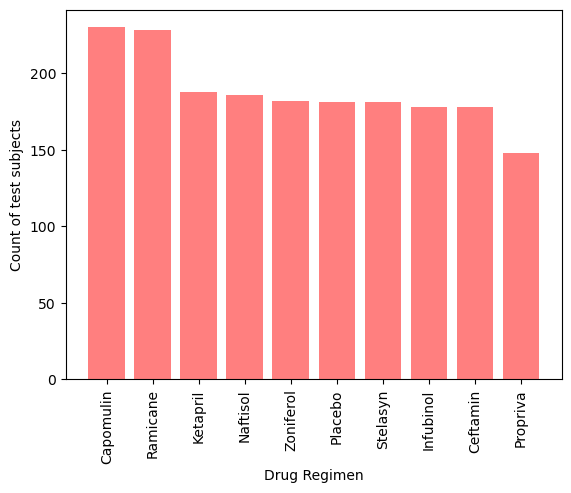

In [125]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
chart = clean_study['Drug Regimen'].value_counts().to_dict()
plt.bar(chart.keys(), chart.values(), color='r', alpha=0.5, align="center")
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Count of test subjects")
plt.show()

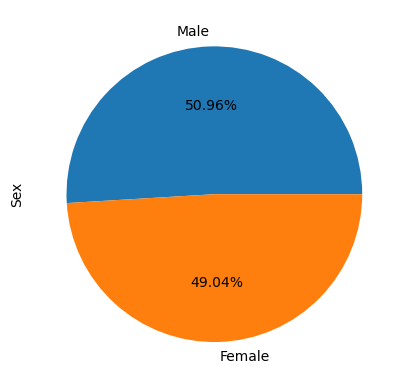

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pandas_method = clean_study['Sex'].value_counts().plot(kind='pie', autopct= '%1.2f%%')

plt.show()

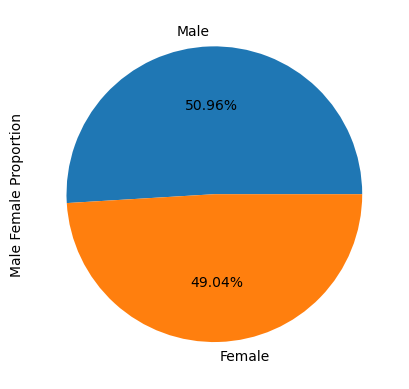

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
chart = clean_study['Sex'].value_counts()
plt.pie(chart,labels = ['Male','Female'],autopct= '%1.2f%%')
plt.ylabel("Male Female Proportion")
plt.show()

## Quartiles, Outliers and Boxplots


In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
top_drugs_df = clean_study[clean_study['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = pd.DataFrame(top_drugs_df.groupby(['Mouse ID'])['Timepoint'].max()).reset_index()
print(max_time_df)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = clean_study.merge(max_time_df, how = 'right',on = ['Mouse ID','Timepoint'])
new_df

   Mouse ID  Timepoint
0      a203         45
1      a251         45
2      a275         45
3      a411         45
4      a444         45
..      ...        ...
95     y769         45
96     y793         45
97     y865         45
98     z578         45
99     z581         45

[100 rows x 2 columns]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [217]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = new_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_vol = new_df[new_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_vol.loc[(tumor_vol>upper_bound) | (tumor_vol<lower_bound)]
    print(f'{drug} potential outliers: {outlier}')

Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


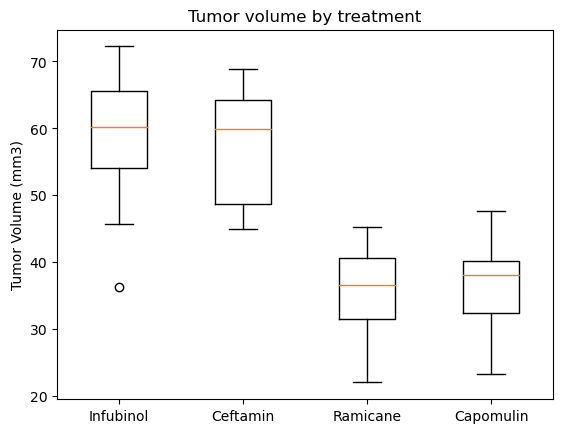

In [229]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
 
# Creating plot
plt.boxplot(tumor_data, labels= treatments)
plt.title("Tumor volume by treatment")
plt.ylabel("Tumor Volume (mm3)")
# show plot
plt.show()

<Axes: title={'center': 'Tumor volume over time'}, xlabel='Timepoint', ylabel='Tumor volume'>

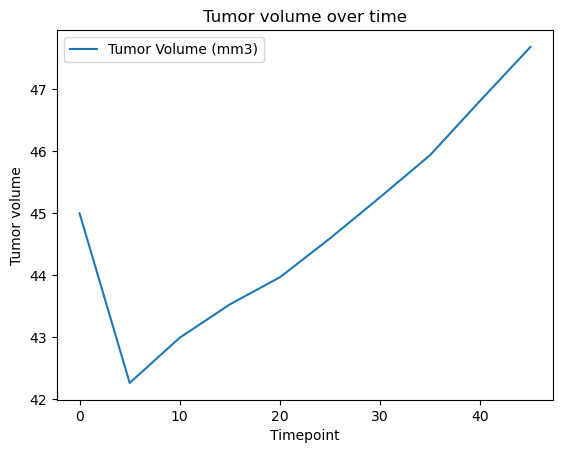

In [261]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = clean_study[clean_study['Drug Regimen'].isin(['Capomulin'])]
mouse_plot_df = cap_df.loc[cap_df['Mouse ID']=='i557']

mouse_plot_df.plot('Timepoint','Tumor Volume (mm3)',xlabel='Timepoint', ylabel='Tumor volume',title='Tumor volume over time')

C:\Users\OMEN\AppData\Local\Temp\ipykernel_55464\1327365914.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tumorvolume = cap_df.groupby('Mouse ID').mean()


<Axes: title={'center': 'Tumor volume v mouse weight'}, xlabel='Weight (g)', ylabel='Tumor volume (mm3)'>

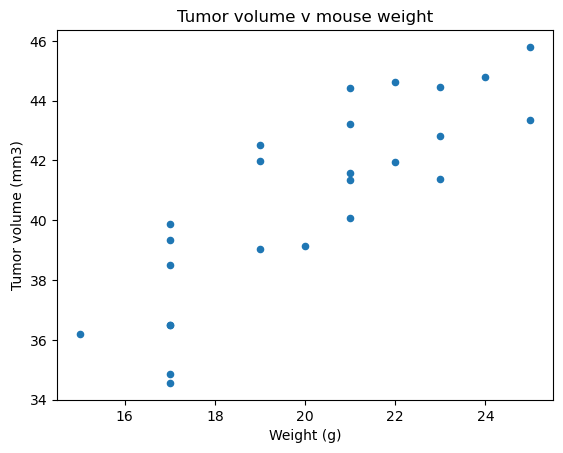

In [273]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumorvolume = cap_df.groupby('Mouse ID').mean()

avg_tumorvolume.plot('Weight (g)','Tumor Volume (mm3)',kind='scatter',xlabel='Weight (g)', ylabel='Tumor volume (mm3)',title='Tumor volume v mouse weight')


## Correlation and Regression


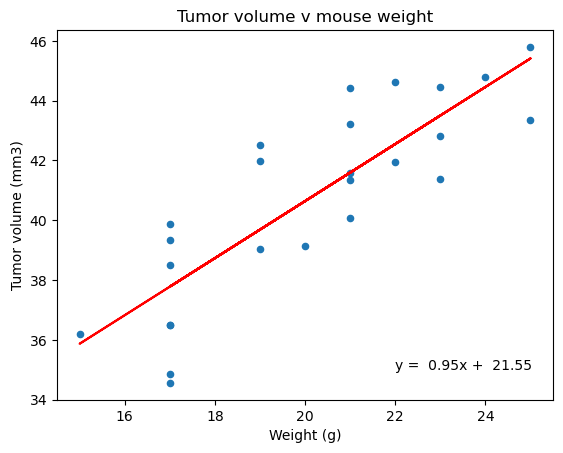

The correlation coefficient between the mouse weight and the average tumor volume is: 0.84


In [288]:
# Calculate the correlation coefficient and a linear regression model 
correl = st.pearsonr(avg_tumorvolume['Weight (g)'], avg_tumorvolume['Tumor Volume (mm3)'])
(b1,b0,rvalue,pvalue,stderr) = st.linregress(avg_tumorvolume['Weight (g)'], avg_tumorvolume['Tumor Volume (mm3)'])

predictions = b0 + b1* avg_tumorvolume ['Weight (g)']

line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumorvolume.plot('Weight (g)','Tumor Volume (mm3)',kind='scatter',xlabel='Weight (g)', ylabel='Tumor volume (mm3)',title='Tumor volume v mouse weight')
plt.plot(avg_tumorvolume['Weight (g)'], predictions, color = 'r')
plt.annotate(line_eq,(22, 35))
plt.show()

print(f'The correlation coefficient between the mouse weight and the average tumor volume is: {round(correl[0],2)}')